# Programming Assgiment: Forecasting average salavy in Russia 

1. Визуальный анализ ряда
2. Стабилизация дисперсии (при необходимости)
3. Выбор порядка дифференцирования
4. Выбор начальных приближений для p,q,P,Qp, q, P, Qp,q,P,Q
5. Обучение и сравнение моделей-кандидатов, выбор победителя
6. Анализ остатков построенной модели, при необходимости — её модификация: если остатки получаются смещёнными, прогноз нужно скорректировать на константу; если остатки нестационарны или автокоррелированы, можно попробовать расширить область, в которой подбираются значения p,q,P,Qp, q, P, Qp,q,P,Q.
7. Прогнозирование с помощью финальной модели.

In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('WAG_C_M.csv')#, index_col=['month;WAG_C_M'])
df.head()

,month;WAG_C_M
0,01.01.1993;15.3
1,01.02.1993;19.1
2,01.03.1993;23.6
3,01.04.1993;30.6
4,01.05.1993;37.5


In [3]:
df.rename(columns={'month;WAG_C_M':'data'}, inplace=True)
data = df['data'].values.tolist()
df['month'] = [line[:10] for line in data]
df['WAG_C_M'] = [line[11:] for line in data]
del df['data']
df.set_index('month')
df.head()

,month,WAG_C_M
0,01.01.1993,15.3
1,01.02.1993,19.1
2,01.03.1993,23.6
3,01.04.1993,30.6
4,01.05.1993,37.5


At that moment I realized that data manipulation above were unnecessary...  
Still, I'll live it there for the first commit.

In [4]:
df = pd.read_csv('WAG_C_M.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
df.head()

,WAG_C_M
month,
1993-01-01,15.3
1993-02-01,19.1
1993-03-01,23.6
1993-04-01,30.6
1993-05-01,37.5


1. Визуальный анализ ряда

<Figure size 1080x504 with 0 Axes>

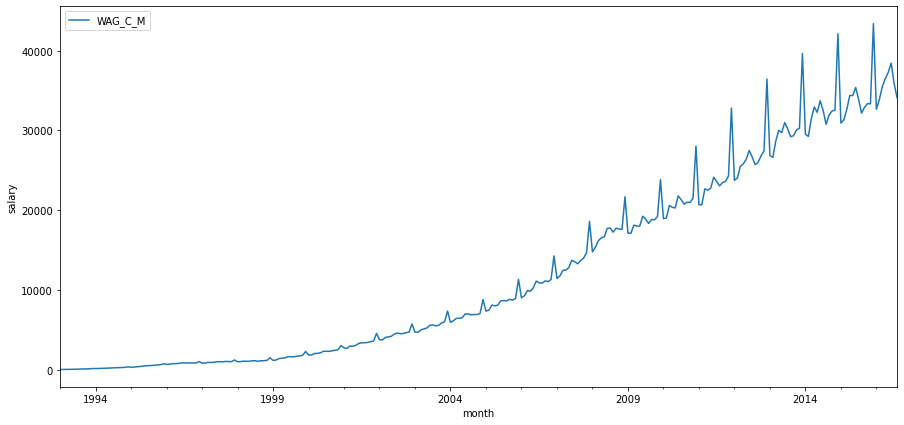

In [5]:
plt.figure(figsize(15,7))
df.plot() 
plt.ylabel('salary')
pylab.show()

Критерий Дики-Фуллера: p=0.991850


<Figure size 1080x720 with 0 Axes>

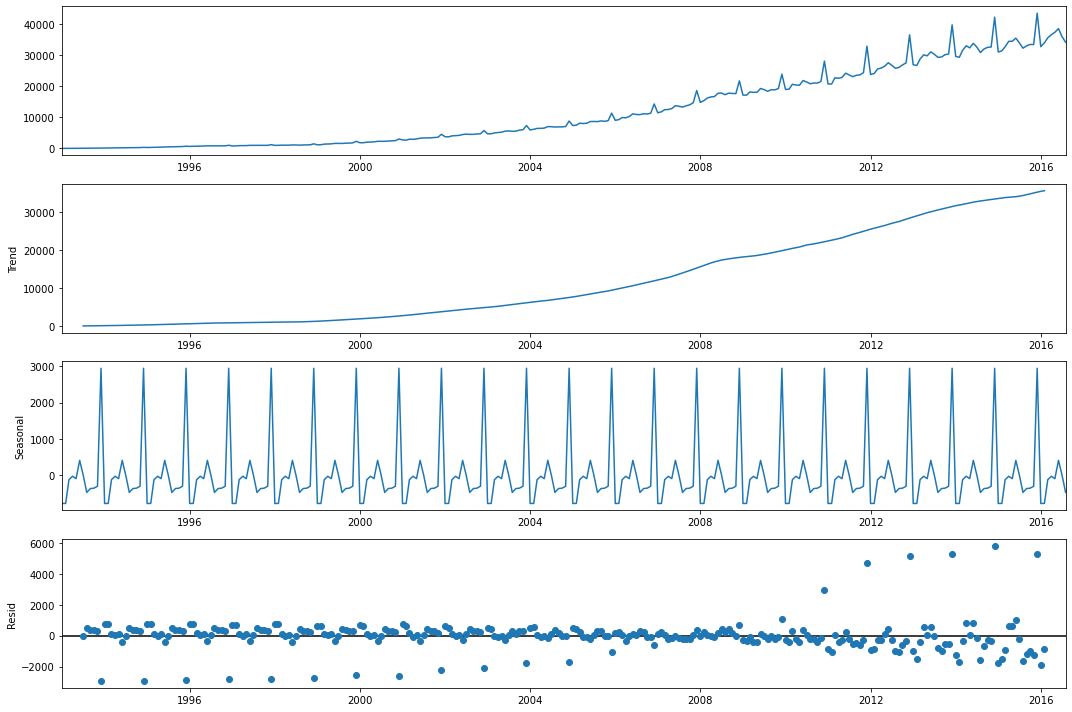

In [6]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df)[1])

График указывает на следуюшее свойства ряда:
1. Восходящий тренд
2. Сезонность
3. Разброс дисперсии

2. Стабилизация дисперсии (при необходимости)

Оптимальный параметр преобразования Бокса-Кокса: 0.263202
Критерий Дики-Фуллера: p=0.696899


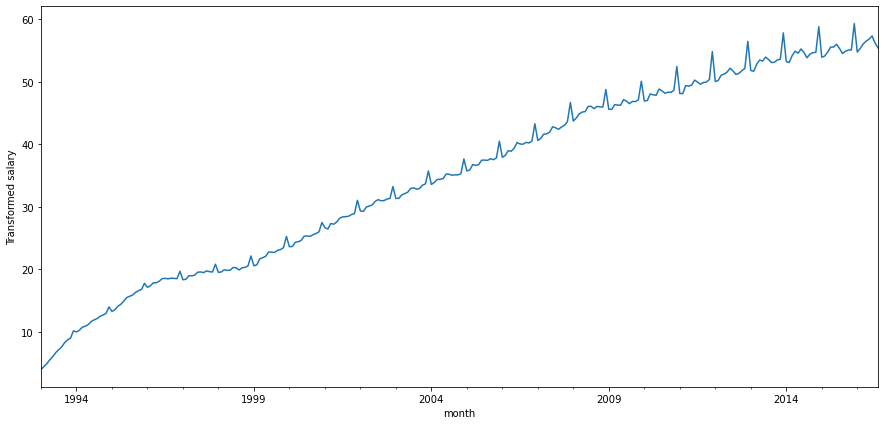

In [7]:
df['WAG_C_M'], lmbda = stats.boxcox(df['WAG_C_M'])
plt.figure(figsize(15,7))
df['WAG_C_M'].plot()
plt.ylabel(u'Transformed salary')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df)[1])

3. Выбор порядка дифференцирования

Критерий Дики-Фуллера: p=0.014697


<Figure size 1080x720 with 0 Axes>

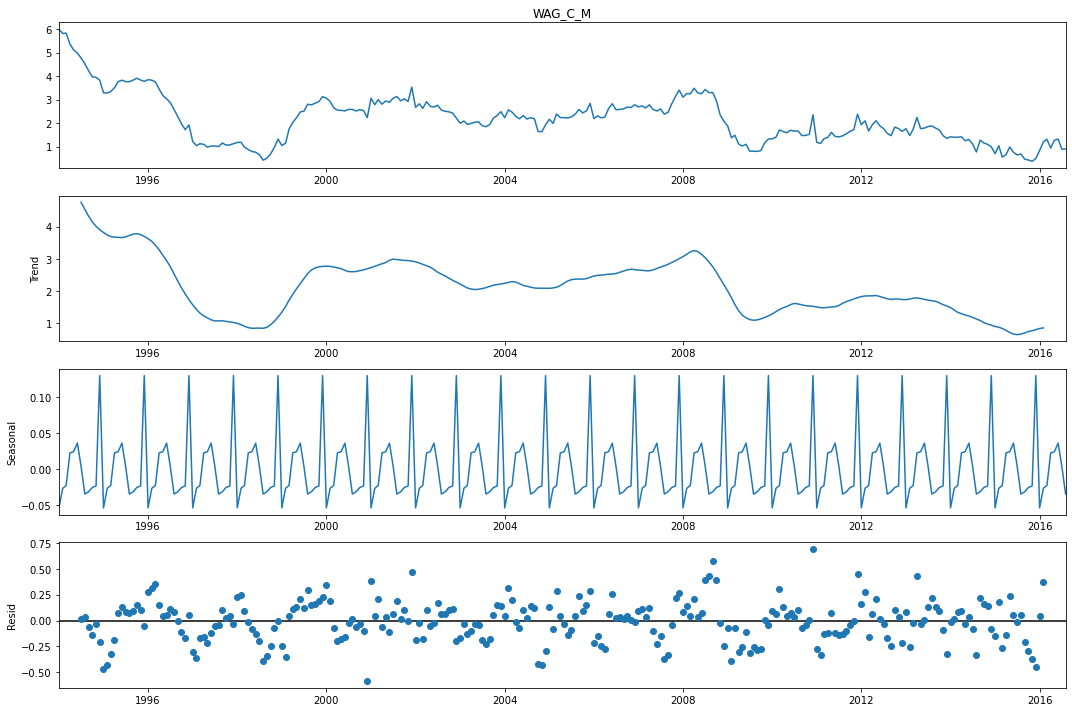

In [8]:
df['WAG_C_M'] = df['WAG_C_M'] - df['WAG_C_M'].shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['WAG_C_M'][12:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['WAG_C_M'][12:])[1])

Все еще заметен тренд - стационарность не достигнута.
Применим обычное дифференцирование.

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

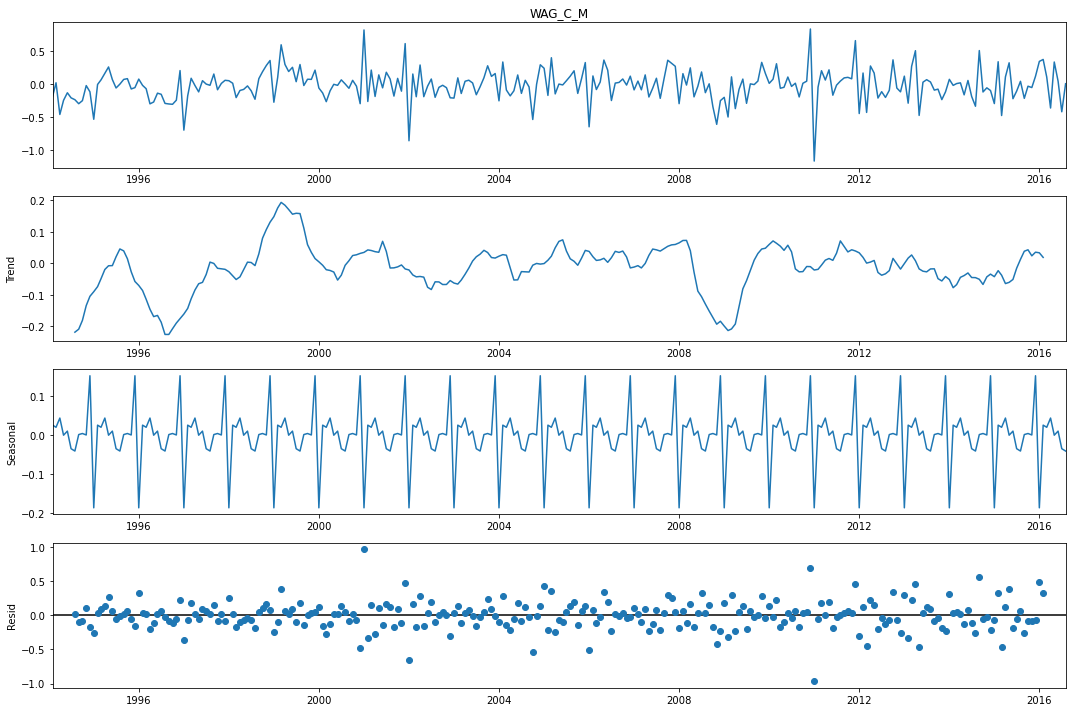

In [9]:
df['WAG_C_M'] = df['WAG_C_M'] - df['WAG_C_M'].shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['WAG_C_M'][13:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['WAG_C_M'][13:])[1])

Гипотеза стационарности отвергается согласно критерию Дики-Фуллера.

4. Выбор начальных приближений для p,q,P,Q.

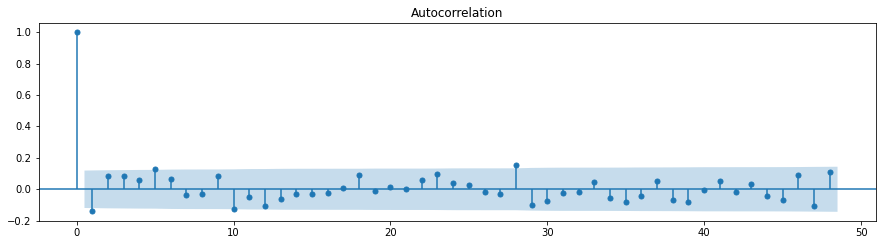

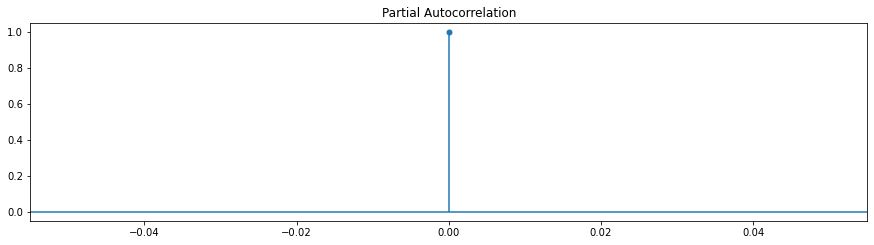

In [10]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['WAG_C_M'][13:].values.squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['WAG_C_M'].values.squeeze(), lags=48, ax=ax)
pylab.show()

q = 2  
Q = 1   
p =  
P =  

5. Обучение и сравнение моделей-кандидатов, выбор победителя

6. Анализ остатков построенной модели, при необходимости — её модификация: если остатки получаются смещёнными, прогноз нужно скорректировать на константу; если остатки нестационарны или автокоррелированы, можно попробовать расширить область, в которой подбираются значения  p,q,P,Q.

7. Прогнозирование с помощью финальной модели.